In [1]:
import pandas as pd 
import numpy as np 
import random
import math
from datetime import datetime

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('E:\\khai pha dl\\data\\wine.csv')
df2 = pd.read_csv('E:\\khai pha dl\\data\\Brain.csv')
df3 = pd.read_csv('E:\\khai pha dl\\data\\Lung_cancer.csv')

In [3]:
# select input and output data for model
# wine
X = df1.iloc[:,df1.columns !='class']
r, c = df1.shape
y = df1[['class']]

In [4]:
def RandomForest(df, n):
    X = df.iloc[:,df.columns !='class']
    r, c = df.shape
    y = df[['class']]

    Train_x, Test_x, Train_y, Test_y = train_test_split(X,  y, 
                                                        stratify=y, 
                                                        test_size=0.3, 
                                                        random_state = 42)
    
    # Random Forest Classifier Algorithm
    start = datetime.now()
    rf_model = RandomForestClassifier(n_estimators = n, max_features= int(math.sqrt(c))+1)
    rf_model.fit(Train_x,Train_y.values.ravel())
    y_pred = rf_model.predict(Test_x)
    end = datetime.now() - start
    

    acc_RF = metrics.accuracy_score(Test_y, y_pred)
    print("Số lượng cây: ", n)
    print("Độ chính xác của Random Forest: ", acc_RF)
    print("Thời gian chạy: ", end)

In [5]:
Tree_nums = [10, 100, 200, 500, 1000]
print("Wine.csv: ")
for n in Tree_nums:
    RandomForest(df1, n)
print("Brain.csv: ")
for n in Tree_nums:
    RandomForest(df2, n)
print("Lung_cancer: ")
for n in Tree_nums:
    RandomForest(df3, n)

Wine.csv: 
Số lượng cây:  10
Độ chính xác của Random Forest:  0.9629629629629629
Thời gian chạy:  0:00:00.018787
Số lượng cây:  100
Độ chính xác của Random Forest:  1.0
Thời gian chạy:  0:00:00.141788
Số lượng cây:  200
Độ chính xác của Random Forest:  1.0
Thời gian chạy:  0:00:00.281267
Số lượng cây:  500
Độ chính xác của Random Forest:  1.0
Thời gian chạy:  0:00:00.678048
Số lượng cây:  1000
Độ chính xác của Random Forest:  1.0
Thời gian chạy:  0:00:01.378712
Brain.csv: 
Số lượng cây:  10
Độ chính xác của Random Forest:  0.8461538461538461
Thời gian chạy:  0:00:00.091048
Số lượng cây:  100
Độ chính xác của Random Forest:  0.7692307692307693
Thời gian chạy:  0:00:00.241285
Số lượng cây:  200
Độ chính xác của Random Forest:  0.6923076923076923
Thời gian chạy:  0:00:00.405596
Số lượng cây:  500
Độ chính xác của Random Forest:  0.7692307692307693
Thời gian chạy:  0:00:00.904720
Số lượng cây:  1000
Độ chính xác của Random Forest:  0.7692307692307693
Thời gian chạy:  0:00:01.731364
Lung_ca

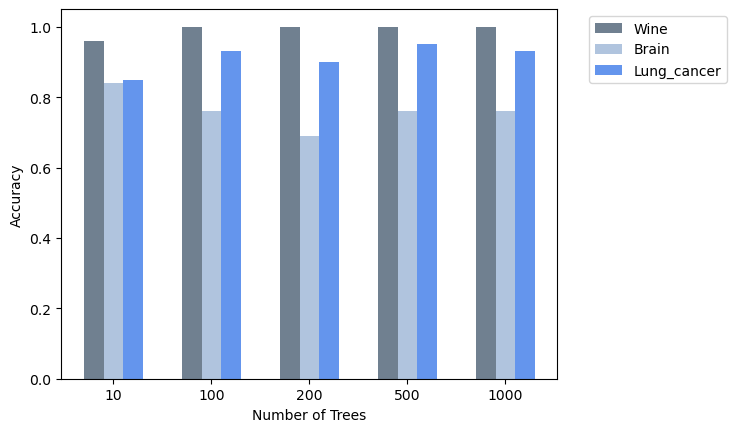

In [6]:
import matplotlib.pyplot as plt
import numpy as np

num_trees = [10, 100, 200, 500, 1000]

accuracy = {'Wine': [0.96, 1, 1, 1, 1],
            'Brain': [0.84, 0.76, 0.69, 0.76, 0.76],
            'Lung_cancer': [0.85, 0.93, 0.90, 0.95, 0.93]}

N = len(num_trees)
width = 0.2
ind = np.arange(N)

fig, ax = plt.subplots()
rects1 = ax.bar(ind, accuracy['Wine'], width, color='slategrey')
rects2 = ax.bar(ind+width, accuracy['Brain'], width, color='lightsteelblue')
rects3 = ax.bar(ind+2*width, accuracy['Lung_cancer'], width, color='cornflowerblue')

ax.set_ylabel('Accuracy')
ax.set_xlabel('Number of Trees')
ax.set_xticks(ind+width)
ax.set_xticklabels(num_trees)

ax.legend((rects1[0], rects2[0], rects3[0]), ('Wine', 'Brain', 'Lung_cancer'), loc = 'upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [7]:
# accuracy_score list
acc_DT =list()
acc_RF= list()

# time 
time_DT =list()
time_RF =list()

In [8]:
def Compare(df, n):
    X = df.iloc[:,df.columns !='class']
    r, c = df.shape
    y = df[['class']]
    for i in range (100):
        Train_x, Test_x, Train_y, Test_y = train_test_split(X,  y, 
                                                            stratify=y, 
                                                            test_size=0.3, 
                                                            #random_state = 42)
                                                            random_state = random.randint(0,100000))
        # Decision Tree Algorithm
        start = datetime.now()
        model = DecisionTreeClassifier()
        model.fit(Train_x, Train_y)        
        y_pred = model.predict(Test_x)
        end = datetime.now() - start
    
        time_DT.append(end)
        acc = metrics.accuracy_score(Test_y, y_pred)
        acc_DT.append(acc)
    
        # Random Forest Classifier Algorithm
        start = datetime.now()
        rf_model = RandomForestClassifier(n_estimators=n, max_features= int(math.sqrt(c))+1)
        rf_model.fit(Train_x,Train_y.values.ravel())
        y_pred = rf_model.predict(Test_x)
        end = datetime.now() - start

        time_RF.append(end)    
        acc_RF.append(metrics.accuracy_score(Test_y, y_pred))  

In [9]:
Compare(df3, 200)

In [10]:
# Decision Tree
print("Decision Tree")
print("  Độ chính xác trung bình: {:.2f}".format(np.mean(acc_DT)))
print("  Độ lệch chuẩn: {:.2f}".format(np.std(acc_DT)))

# Random Forest
print("Random Forest")
print("  Độ chính xác trung bình: {:.2f}".format(np.mean(acc_RF)))
print("  Độ lệch chuẩn: {:.2f}".format(np.std(acc_RF)))

# Time
print("Time")
print("  Decision Tree: ", np.mean(time_DT))
print("  Random Forest: ", np.mean(time_RF))

Decision Tree
  Độ chính xác trung bình: 0.84
  Độ lệch chuẩn: 0.05
Random Forest
  Độ chính xác trung bình: 0.91
  Độ lệch chuẩn: 0.03
Time
  Decision Tree:  0:00:00.671798
  Random Forest:  0:00:01.655926


Text(0, 0.5, 'Accuracy')

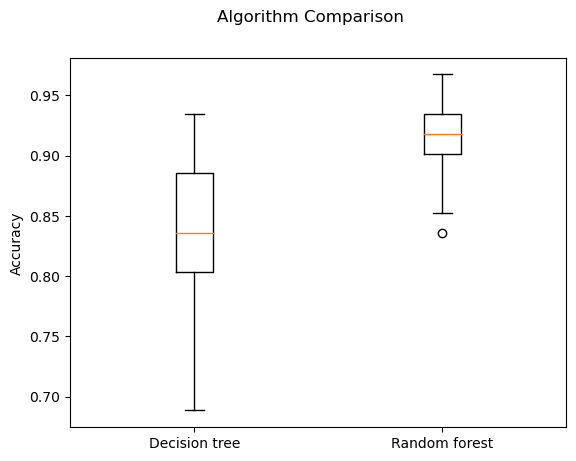

In [11]:
results =[]
results.append(acc_DT)
results.append(acc_RF)

names = ('Decision tree', 'Random forest')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.boxplot(results, labels=names)
plt.ylabel('Accuracy') 